### imports

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from data_config import *
from collect import *

%matplotlib inline

sns.set(style="darkgrid")

### example for one topic

In [3]:
topic = TOPICS[0]
date = DATE[7:17]
path = CANCEL_CULTURE_KEYWORDS_PATH

In [4]:
print('Start:', end='')
print('\t', topic)

print('Date:', end='')
print('\t', DATE[7:17], '-', DATE[24:])

keywords = []
with open(path) as file:
    for line in file:
        keywords.append(line[:-1])

data = make_dataframe(keywords, DATE)
data.to_csv('data/' + topic + '_data_' + date + '.csv')
print('Done:', end='')
print('\t', topic)

Start:	 cancel_culture
Date:	 2022-01-01 - 2022-01-02


100%|███████████████████████████████████████████| 32/32 [00:56<00:00,  1.77s/it]

Done:	 cancel_culture


In [5]:
print('Examples:')
print()
make_examples(data, 2)

Examples:

@ttaeuriel все дружно кэнселим его в твиттере

@star_exploser Ой я этого не знаю честно 
Не слежу за этим
Знаю лишь то что как культуру отмены в сторону Ро постоянно этот факт используют что «это злобное транс соо не пустило создательницу в спецвыпуск»
Хотя на сколько знаю не говорилось напрямую почему ее там не будет



### example for all topics

In [6]:
for topic in TOPICS:
    print('Start:', end='')
    print('\t', topic)

    print('Date:', end='')
    print('\t', DATE[7:17], '-', DATE[24:])

    keywords = []
    with open(globals()[topic.upper() + '_KEYWORDS_PATH']) as file:
        for line in file:
            keywords.append(line[:-1])

    data = make_dataframe(keywords, DATE)
    data.to_csv('data/' + topic + '_data_' + date + '.csv')
    print('Done:', end='')
    print('\t', topic)
    print()

Start:	 cancel_culture
Date:	 2022-01-01 - 2022-01-02


100%|███████████████████████████████████████████| 32/32 [00:53<00:00,  1.67s/it]


Done:	 cancel_culture

Start:	 feminism
Date:	 2022-01-01 - 2022-01-02


100%|███████████████████████████████████████████| 59/59 [01:44<00:00,  1.78s/it]


Done:	 feminism

Start:	 lgbtq_plus
Date:	 2022-01-01 - 2022-01-02


100%|███████████████████████████████████████████| 81/81 [02:35<00:00,  1.92s/it]


Done:	 lgbtq_plus

Start:	 ageism
Date:	 2022-01-01 - 2022-01-02


100%|███████████████████████████████████████████| 23/23 [00:38<00:00,  1.67s/it]


Done:	 ageism

Start:	 lookism
Date:	 2022-01-01 - 2022-01-02


100%|███████████████████████████████████████████| 55/55 [01:32<00:00,  1.68s/it]

Done:	 lookism



### look on shapes of dataframes

In [7]:
data_cc = pd.read_csv('data/' + TOPICS[0] + '_data_' + date + '.csv')
data_fem = pd.read_csv('data/' + TOPICS[1] + '_data_' + date + '.csv')
data_lgbt = pd.read_csv('data/' + TOPICS[2] + '_data_' + date + '.csv')
data_age = pd.read_csv('data/' + TOPICS[3] + '_data_' + date + '.csv')
data_look = pd.read_csv('data/' + TOPICS[4] + '_data_' + date + '.csv')

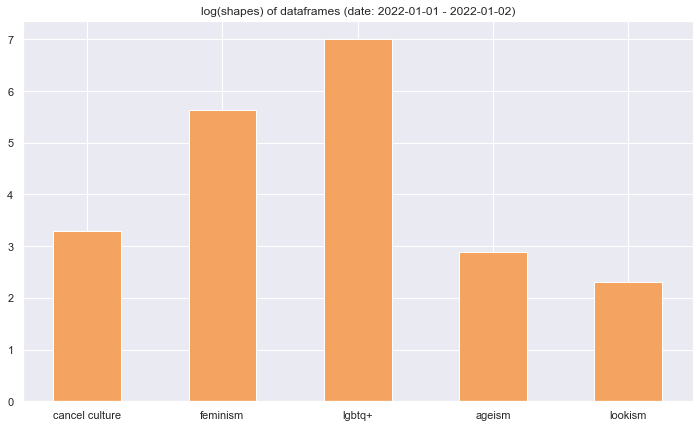

In [8]:
x = ['cancel culture', 'feminism', 'lgbtq+', 'ageism', 'lookism']
y = [data_cc.shape[0], data_fem.shape[0], data_lgbt.shape[0], data_age.shape[0], data_look.shape[0]]
y_log = np.log1p(y)

plt.figure(figsize=(12, 7))

plt.bar(range(1, 6), y_log, width = 0.5, color='sandybrown')

plt.xticks([i for i in range(1, 6)], x)
plt.title('log(shapes) of dataframes (date: ' + DATE[7:17] +' - ' + DATE[24:] +')')
plt.show()